In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [127]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [128]:
# dropping the first column because it is as index
df = df.drop(["Unnamed: 0"], axis = 1)

In [129]:
df.shape

(18249, 13)

In [130]:
columns = list(df.columns)
columns

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [131]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [132]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


All the columns are numerical features except for the year. But we will keep the year as numerical features so that it can be used for the upcoming year prediction for the machine learning model. Moreover, date is a series feature and type is a categorical feature.

In [133]:
feat = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
        'XLarge Bags']

df[feat].corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000


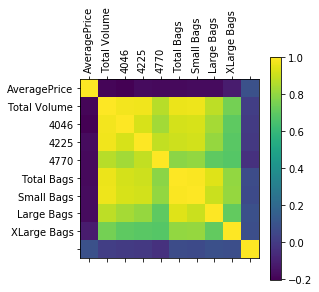

In [134]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.xticks(range(df.shape[1]-3),df[feat].columns, rotation=90)
plt.yticks(range(df.shape[1]-3), df[feat].columns)
plt.colorbar()
plt.show();

There are some features which are correlated but we are not intended to remove those features because we have small number of features.

### checking the outliers

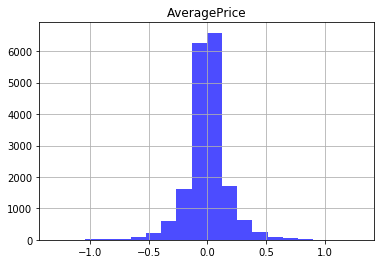

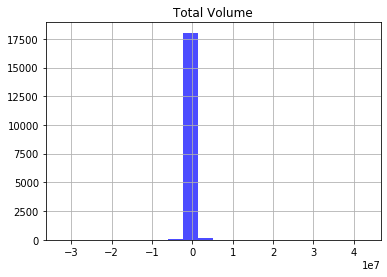

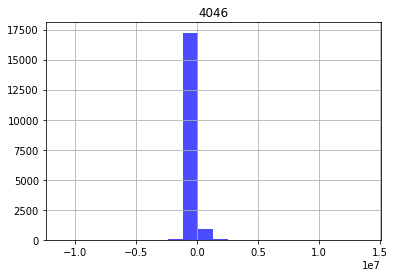

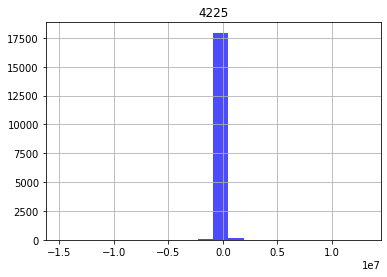

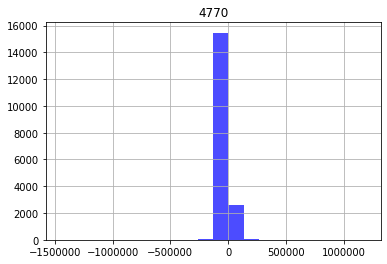

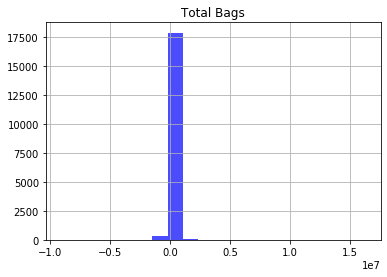

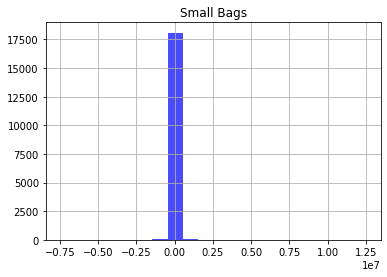

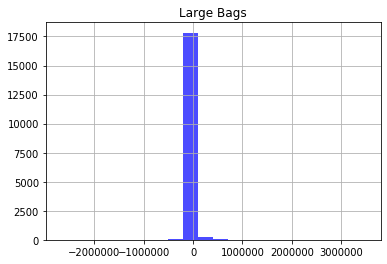

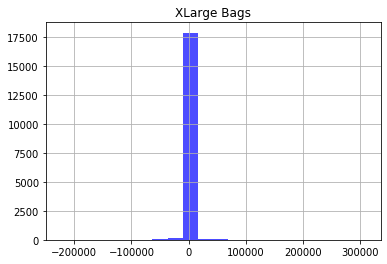

In [135]:
import matplotlib.pyplot as plt

for i in feat:
    plt.figure()
    plt.title(i)
    df[i].diff().hist(color='b', alpha=0.7, bins=20)

The distribution of all the numerical features is normal. Some of the features have some skewness. 

In [136]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
AveragePrice,0.580303,0.325196
Total Volume,9.007687,92.104458
4046,8.648220,86.809113
4225,8.942466,91.949022
4770,10.159396,132.563441
Total Bags,9.756072,112.272156
Small Bags,9.540660,107.012885
Large Bags,9.796455,117.999481
XLarge Bags,13.139751,233.602612
year,0.215339,-1.032747


### removing the skewness

In [137]:
columns = list(df.columns)
skew = ['Total Volume','4046','4225', '4770', 'Total Bags', "Small Bags", "Large Bags", "XLarge Bags"]

for col in skew:
    df.insert(list(df).index(col), col + '1', np.sqrt(df.iloc[:,columns.index(col)]))
    df = df.drop([col], axis = 1)

In [138]:
df.columns = columns
df[skew].agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Total Volume,3.986597,22.776650
4046,3.952972,21.127622
4225,3.896355,21.705023
4770,4.128605,23.427882
Total Bags,4.128864,24.839119
Small Bags,4.035940,23.625168
Large Bags,4.134963,24.148923
XLarge Bags,4.827368,32.513585


The skewness have been reduced but can be reduced more.

In [139]:
columns = list(df.columns)
skew = ['Total Volume','4046','4225', '4770', 'Total Bags', "Small Bags", "Large Bags", "XLarge Bags"]

for col in skew:
    df.insert(list(df).index(col), col + '1', np.sqrt(df.iloc[:,columns.index(col)]))
    df = df.drop([col], axis = 1)
df.columns = columns
df[skew].agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Total Volume,1.531126,3.588147
4046,1.541756,3.104549
4225,1.387105,2.970057
4770,1.471863,2.537672
Total Bags,1.546645,3.988975
Small Bags,1.436095,3.515781
Large Bags,1.282049,2.594014
XLarge Bags,2.042621,4.292691


The skewness have been reduced significantly.

### checking for outliers

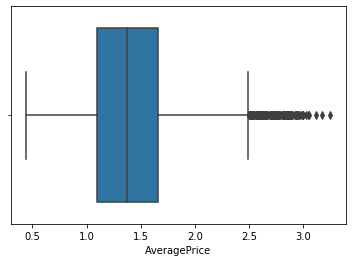

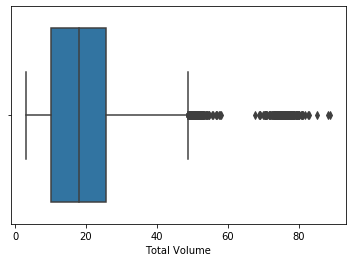

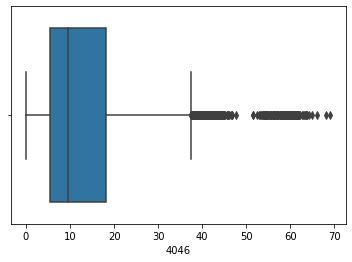

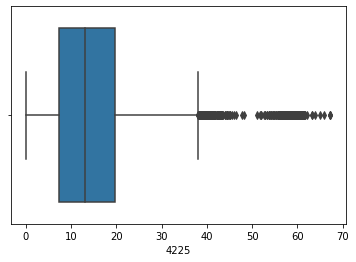

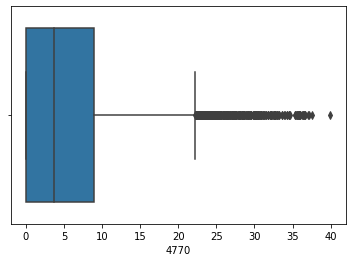

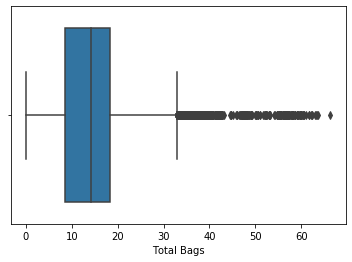

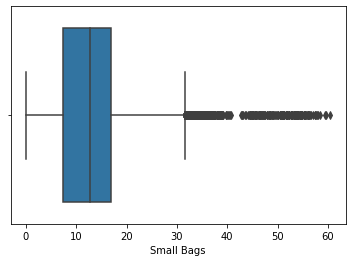

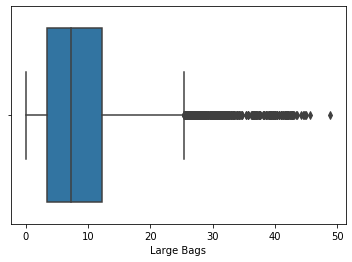

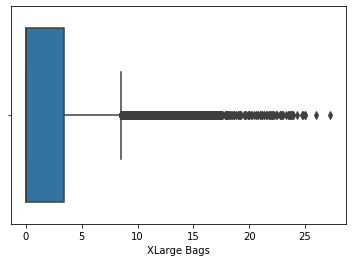

In [140]:
for i in feat:
    plt.figure()
    sns.boxplot(x=df[i])

In [141]:
# creating a copy of dataframe
outliers = feat
y = 0
for i in outliers:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    a = df.shape[0]
    b = df1.shape[0]
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]
    c = df.shape[0]
    x = round((b-c)*100/a)
    y = y + x
    print (x,"% rows have been removed from the data frame due to outliers in", i)
print("total",y,"% of rows have been removed")

-21 % rows have been removed from the data frame due to outliers in AveragePrice
-18 % rows have been removed from the data frame due to outliers in Total Volume
-17 % rows have been removed from the data frame due to outliers in 4046
-16 % rows have been removed from the data frame due to outliers in 4225
-15 % rows have been removed from the data frame due to outliers in 4770
-14 % rows have been removed from the data frame due to outliers in Total Bags
-14 % rows have been removed from the data frame due to outliers in Small Bags
-13 % rows have been removed from the data frame due to outliers in Large Bags
0 % rows have been removed from the data frame due to outliers in XLarge Bags
total -128 % of rows have been removed


#### categorical features and numerical features

In [142]:
df =df.drop("Date", axis = 1)
num_feat = feat
# categorical features
columns = list(df.columns)
cat_feat = [feat for feat in columns if feat not in num_feat]

In [143]:
for i in cat_feat:
    print(i,"\n",df[i].unique())

type 
 ['conventional' 'organic']
year 
 [2015 2016 2017 2018]
region 
 ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'Charlotte' 'Chicago' 'CincinnatiDayton' 'Columbus'
 'DallasFtWorth' 'Denver' 'GrandRapids' 'HarrisburgScranton'
 'HartfordSpringfield' 'Houston' 'Indianapolis' 'Jacksonville' 'LasVegas'
 'Louisville' 'MiamiFtLauderdale' 'Nashville' 'NewOrleansMobile' 'NewYork'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke'
 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle' 'SouthCarolina'
 'Southeast' 'Spokane' 'StLouis' 'Syracuse' 'Tampa' 'WestTexNewMexico'
 'Detroit' 'GreatLakes' 'Midsouth' 'Plains' 'California' 'LosAngeles'
 'Northeast' 'SouthCentral' 'TotalUS' 'West']


### using one hot encode for categorical features

In [154]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()



df1 = df[cat_feat].apply(le.fit_transform)
df1.head()

,type,year,region
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [155]:
#merging the dataframe 
for i in cat_feat:
    df[i] = df1[i]

In [157]:
for i in cat_feat:
    print(i,"\n",df[i].unique())

type 
 [0 1]
year 
 [0 1 2 3]
region 
 [ 0  1  2  3  4  5  7  8  9 10 11 12 14 16 17 18 19 20 21 23 24 26 27 28
 30 31 32 33 34 36 37 38 39 40 41 42 43 44 46 47 48 49 50 53 13 15 25 35
  6 22 29 45 51 52]


### spliting the target and features

In [159]:
X = df.drop(["AveragePrice", "region"], axis = 1)
y1 = df["AveragePrice"]
y2 = df["region"]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.20)

## Models for average price prediction

### Linear regression

In [161]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.5088025127675734
0.48698936415628613


The accuracy of the linear regression is low but the accuracy of the training data and test data is smiliar, therefore, there is no overfitting or underfittng of the model.

In [163]:
cross_val_score(LR, X_train, y_train, scoring = "r2", cv = 5)

array([0.50657002, 0.48829611, 0.52421273, 0.49390917, 0.52523934])

### Decision tree

In [164]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [165]:
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))

1.0
0.5916095889429429


The accuracy of training data is much larger than the test data. Therefore the decision tree is overfitting.

In [166]:
cross_val_score(DT, X_train, y_train, scoring = "r2", cv = 5)

array([0.56565686, 0.54528238, 0.56680928, 0.57538684, 0.58645009])

In [167]:
param_dict = {
    "random_state":range(1,20,2),
    "max_depth":range(1,10,2),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}
grid_DT = GridSearchCV(DT,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_DT.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 596 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2996 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5664 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6314 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7064 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split'

In [168]:
grid_DT.score(X_test, y_test)

0.6467614605667286

In [169]:
grid_DT.best_params_

{'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 1}

In [170]:
DT_final = DecisionTreeRegressor(max_depth= 9,min_samples_leaf= 4,min_samples_split= 2,random_state= 1)
DT_final.fit(X_train, y_train)
scores = cross_val_score(DT_final,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.62623204, 0.6373227 , 0.65272993, 0.64401603, 0.64883328])

The accuracy of the decision tree slightly imporove after grid search.

### Random Forest

In [171]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 100)

RF.fit(X_train, y_train)
accuracy = RF.score(X_test, y_test)
accuracy

0.7826953230719856

In [174]:
cross_val_score(RF,X_train, y_train, scoring = "r2", cv = 5 )

array([0.78448764, 0.79519549, 0.78440973, 0.76968787, 0.79291365])

### Gradient Boost

In [172]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(n_estimators = 80)

GB.fit(X_train, y_train)
accuracy = GB.score(X_test, y_test)
accuracy

0.6194503889287295

In [173]:
cross_val_score(GB,X_train, y_train, scoring = "r2", cv = 5 )

array([0.62786651, 0.62355795, 0.63985343, 0.61894275, 0.63506805])

### Best model :Random forest

Since we are getting the best accuracy in random forest. Doing grid search for random forest to fine tune the model.

In [ ]:
param_dict = {
    "n_estimators":range(50,100, 15),
    "max_depth":range(1,10,3),
    "min_samples_split":range(2,10,2),
    "min_samples_leaf":range(1,5)
}
grid_RF = GridSearchCV(RF,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.8min
